<a href="https://colab.research.google.com/github/paritoshtripathi935/CNN/blob/main/paritosh_MIASNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To speed the execution procces, Colaboraty has an option to use GPU. This option is selected by default.

MIAS dataset

In [ ]:
!wget "https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0" -O mias.zip
!unzip mias.zip

--2021-08-12 13:30:53--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 74.125.26.138, 74.125.26.100, 74.125.26.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download [following]
--2021-08-12 13:30:53--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7q4v99kfgi24tr14k5jh91gohc8tfv4/1628775000000/05147614325801676241/*/1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ?e=download [following]
--2021-08-12 13:30:56--  https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0

In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [ ]:
!pip3 install frimcla

     |████████████████████████████████| 422 kB 5.0 MB/s 
     |████████████████████████████████| 5.7 MB 20.0 MB/s 
     |████████████████████████████████| 412.3 MB 18 kB/s 
     |████████████████████████████████| 339 kB 56.8 MB/s 
     |████████████████████████████████| 2.8 MB 47.1 MB/s 
     |████████████████████████████████| 89 kB 7.2 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 503 kB 64.4 MB/s 
     |████████████████████████████████| 3.8 MB 38.3 MB/s 
     |████████████████████████████████| 276 kB 51.0 MB/s 
  Created wheel for frimcla: filename=frimcla-1.0.6-py2.py3-none-any.whl size=576624 sha256=e3e7458eb18b50ad3dc9d1a34ee7ea70b354eed5c3902959e18d43d2f958afff
  Stored in directory: /root/.cache/pip/wheels/7b/fd/4a/1d2a5bd4c3132573c51958159bc4eacb220fc635df5289e673
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=eff59f44fe7cf5a0ec1f84ba953b397ac2257b66b5fdd0b505ccb646cf625f70
  Stored in dire

In [ ]:
!pip install pandas==0.25.1

In [ ]:
!pip install h5py==2.10.0  

We need some libraries to execute this framework and obtain the results. 

In [ ]:
%tensorflow_version 1.x
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison, majorityVoting
from frimcla.train import train
from frimcla.prediction import prediction

TensorFlow 1.x selected.


Using TensorFlow backend.


### Configuring the variables of the program

First of all, we have to indicate the variables that the program need such as the path of the dataset, the models you want to use,...

In [ ]:
datasetPath = "./Mias"
outputPath = "./output"
# featureExtractors = [["inception", "False"]]
batchSize = 32 
verbose = False
# modelClassifiers = [ "MLP","SVM","KNN"] #You can use MLP, SVM, KNN , LogisticRegression or RandomForest
measure = "accuracy" #You can use accuracy, f1, auroc, precision or recall 
trainingSize = 1
nSteps=10


In the next section we have to select the feature extractors that we want to use (It is mandatory to **select at least one option**)

In [ ]:
VGG16 = True #@param {type:"boolean"}
VGG19 = True #@param {type:"boolean"}
ResNet = False #@param {type:"boolean"}
Inception = True #@param {type:"boolean"}
GoogleNet = False #@param {type:"boolean"}
Overfeat = False #@param {type:"boolean"}
Xception = False #@param {type:"boolean"}
Densenet = False #@param {type:"boolean"}
LAB888 = False #@param {type:"boolean"}
LAB444 = False #@param {type:"boolean"}
HSV888 = False #@param {type:"boolean"}
HSV444 = False #@param {type:"boolean"}
Haralick = False #@param {type:"boolean"}
Hog = False #@param {type:"boolean"}
Haarhog = False #@param {type:"boolean"}

featureExtractors = []

if VGG19 :
  featureExtractors.append(["vgg19","False"])
if VGG16 :
  featureExtractors.append(["vgg16","False"])
if ResNet :
  featureExtractors.append(["resnet","False"])
if Inception :
  featureExtractors.append(["inception","False"])
if GoogleNet :
  featureExtractors.append(["googlenet"])
if Overfeat :
  featureExtractors.append(["overfeat","[-3]"])
if Xception :
  featureExtractors.append(["xception","False"])
if Densenet :
  featureExtractors.append(["densenet"])
if LAB888 :
  featureExtractors.append(["lab888"])
if LAB444 :
  featureExtractors.append(["lab444","4,4,4"])
if HSV888 :
  featureExtractors.append(["hsv888"])
if HSV444 :
  featureExtractors.append(["hsv444","4,4,4"])
if Haralick :
  featureExtractors.append(["haralick"])
if Hog :
  featureExtractors.append(["hog"])
if Haarhog :
  featureExtractors.append(["haarhog"])

Now we have to indicate the classifier models that we want to use (It is mandatory to **select at least one option**)

In [ ]:
MLP = True #@param {type:"boolean"}
SVM = True #@param {type:"boolean"}
KNN = True #@param {type:"boolean"}
LogisticRegression = True #@param {type:"boolean"}
GradientBoost = True #@param {type:"boolean"}
RandomForest = True #@param {type:"boolean"}

modelClassifiers = []


if MLP :
  modelClassifiers.append("MLP")
if SVM :
  modelClassifiers.append("SVM")
if KNN :
  modelClassifiers.append("KNN")
if LogisticRegression :
  modelClassifiers.append("LogisticRegression")
if GradientBoost :
  modelClassifiers.append("GradientBoost")
if RandomForest :
  modelClassifiers.append("RandomForest")

### Generating the features

At this step we stored the features of each image of the dataset. These features depend on the model used at this moment because each model stores different features of the image. 

In [ ]:
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

These features (vgg19) are already generated
These features (vgg16) are already generated
These features (inception) are already generated


0.006797075271606445

### Statistical analysis

Now with the features of all the images of each model we can perform a statistical analysis to know which of this models has the best performace.

In [ ]:
%matplotlib inline

In [ ]:
!pip install matplotlib

/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file 

1719.436688899994

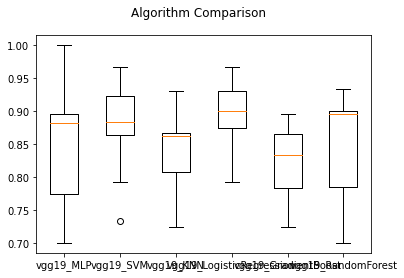

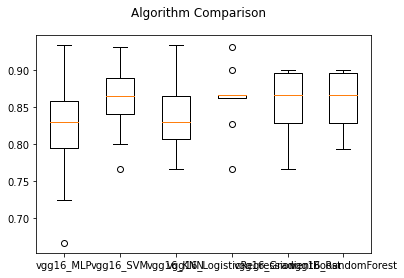

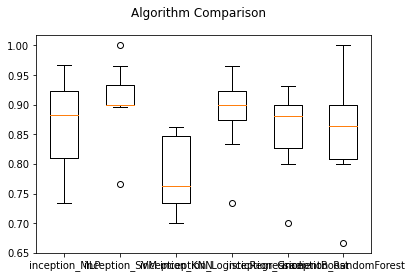

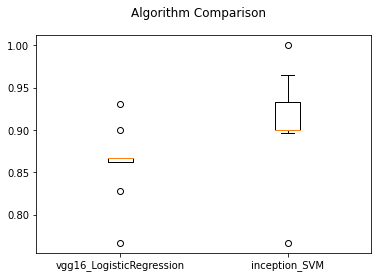

In [ ]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, nSteps, verbose)

In [ ]:
majorityVoting(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, False)

/usr/local/lib/python3.7/dist-packages/frimcla/StatisticalComparison.py:87: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/frimcla/StatisticalComparison.py:87: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/frimcla/StatisticalComparison.py:87: H5pyDepr

182.4125578403473

### Train the model

The study gives us as result the best model and indicates if there are significant differences between this and the rest of the models. With this information, we can train the best model and return as a result of the framework to the user.

In this function FrImCla asks the user if he/she wants a web application or not (Y if the user wants the webapp). This web application uses the best model selected by FrImCla for this problem. The application generated is very simple and only contains a text box and a button to predict the class of new images. FrImCla generates a zip file that must be decompressed to be used. Inside the folder the user has to open a new terminal in this path and run the following command:

`python3 FlaskApp/app.py`

The comand executes the web application in http://localhost:5000/ To use the application the user has to write open the link in his/her browser.

In [ ]:
train(outputPath, datasetPath, trainingSize)

[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...


/usr/local/lib/python3.7/dist-packages/frimcla/train.py:52: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):


[INFO] best hyperparameters: {'activation': 'identity', 'alpha': 0, 'learning_rate': 'adaptive', 'momentum': 0.95, 'solver': 'lbfgs'}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 1000}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'n_neighbors': 5}
[INFO] dumping classifier...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[INFO] best hyperparameters: {'C': 10000.0}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'min_samples_leaf': 10, 'max_features': 10, 'max_depth': None}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'min_samples_leaf': 1, 'max_features': 10, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
[INFO] dumping classifier...
[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...


/usr/local/lib/python3.7/dist-packages/frimcla/train.py:52: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_netw

[INFO] best hyperparameters: {'activation': 'logistic', 'alpha': 0, 'learning_rate': 'invscaling', 'momentum': 0.95, 'solver': 'lbfgs'}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'C': 100}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'n_neighbors': 7}
[INFO] dumping classifier...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[INFO] best hyperparameters: {'C': 10000.0}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'min_samples_leaf': 10, 'max_features': 10, 'max_depth': None}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'min_samples_leaf': 3, 'max_features': 10, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
[INFO] dumping classifier...
[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...


/usr/local/lib/python3.7/dist-packages/frimcla/train.py:52: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):


[INFO] best hyperparameters: {'activation': 'logistic', 'alpha': 0, 'learning_rate': 'invscaling', 'momentum': 0.9, 'solver': 'lbfgs'}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'C': 1000}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'n_neighbors': 5}
[INFO] dumping classifier...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[INFO] best hyperparameters: {'C': 1000.0}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'min_samples_leaf': 3, 'max_features': 10, 'max_depth': 3}
[INFO] dumping classifier...
[INFO] best hyperparameters: {'min_samples_leaf': 1, 'max_features': 3, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
y


303.0840964317322

### Predict the class of the images

Finally, we have the best model and we can use it to predict the class of our images. To do this we have to use the following command and we have to define the feature extractor and the classifier.

In [ ]:
image = "./Mias/NORMAL/mdb035.jpg"
featExt = ["inception", "False"]
classi = "SVM"
prediction(featExt, classi, image, outputPath, datasetPath)

[INFO] loading model...
This is not the best model. Are you sure you want to predict with it?
yes


/usr/local/lib/python3.7/dist-packages/frimcla/prediction.py:65: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural

[INFO] loading ['inception', 'False']...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)





[INFO] class predicted for the image NORMAL:mdb035.jpg: ['NORMAL']


[array(['NORMAL'], dtype='<U8')]

In [ ]:
!cat output/Mias/predictionResults.csv

image_id, Mias
NORMAL:mdb035.jpg, 1
